# Excercises to cointegration and VECM (Lasse)

In [87]:
suppressMessages(library(tidyverse)) # Readr, ggplot, dplyr, ...
suppressMessages(library(gridExtra)) # Arrangning ggplots
suppressMessages(library(readxl))    # Loading excel
suppressMessages(library(repr))      # Resizing the plots in jupyter
suppressMessages(library(rugarch))   # For ARCH and GARCH models
suppressMessages(library(dynlm))     # Lagged linear models
suppressMessages(library(urca))      # Dick Fuller test
suppressMessages(library(car))       # Linear hyphothesis testing
suppressMessages(library(tseries))   # Adf-test
suppressMessages(library(vars))      # VAR models
suppressMessages(library(zoo))       # Convert quarters to date
suppressMessages(library(forecast))  # Help in plotting TS
suppressMessages(library(fGarch))    # The library Lasse uses to do GARCH
suppressMessages(library(expm))      # Matrix calculations 
suppressMessages(library(tsDyn))

options(warn=-1) # Carefull this disables all warnings
options(repr.plot.width=8, repr.plot.height=2.2)

setwd("C:/Users/larsn/Documents/GitHub/Applied-Econometric-Time-Series-WE")

# Exercise 1 (Theoretical)
Enders exercise 1 in chapter 6. Question d and e are optional.

# Excercise 2 (Quantitative)
Enders exercise 2a only in chapter 6. Question 2b is optional

In [88]:
coint <- read_excel("Data/Coint6.xls")
head(coint)

y,z,w
-1.80156,-0.4969500,-1.79957
-2.27002,-0.1490799,-2.36988
-2.21743,0.1181677,-2.12782
-2.36609,0.2260346,-2.30212
-2.06364,0.1829068,-1.93444
-2.17761,0.1754546,-1.62233


### Reproduction of graph on page 365

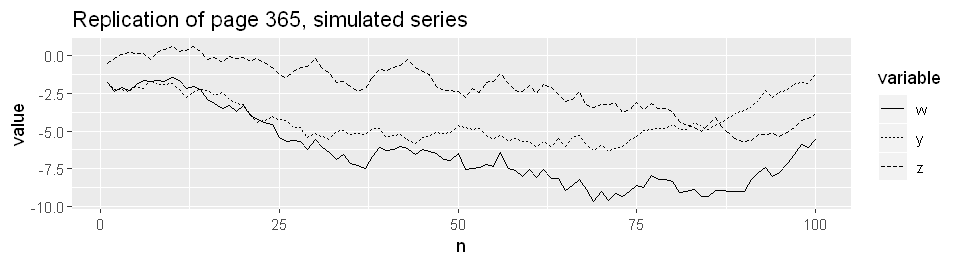

In [89]:
coint2 <- coint
coint2$n <- c(1:nrow(coint2))
p <- coint2 %>%
  gather(variable, value, -n) %>%
  ggplot(aes(n, value, linetype=variable)) + 
    geom_line() + 
    labs(title="Replication of page 365, simulated series")
print(p)

### Reproduction of results on page 366

In [10]:
reg_y <- lm(y ~ z + w, data=coint)
reg_z <- lm(z ~ y + w, data=coint)
reg_w <- lm(w ~ y + z, data=coint)
reg_y
reg_z
reg_w


Call:
lm(formula = y ~ z + w, data = coint)

Coefficients:
(Intercept)            z            w  
   -0.04843     -0.92731      0.97688  



Call:
lm(formula = z ~ y + w, data = coint)

Coefficients:
(Intercept)            y            w  
    0.05896     -1.01082      1.02549  



Call:
lm(formula = w ~ y + z, data = coint)

Coefficients:
(Intercept)            y            z  
   -0.08524      0.99007      0.95347  


### Reproduction of results on page 368

In [11]:
reg_w <- lm(w ~ y + z, data=coint)
res <- as.ts(reg_w$residuals[-1])

y <- as.ts(diff(coint$y))
z <- as.ts(diff(coint$z))
w <- as.ts(diff(coint$w))

ty <- t(summary(dynlm(y ~ L(res,1) + L(y,1) + L(z,1) + L(w,1)))$coef[,1])
tz <- t(summary(dynlm(z ~ L(res,1) + L(y,1) + L(z,1) + L(w,1)))$coef[,1])
tw <- t(summary(dynlm(w ~ L(res,1) + L(y,1) + L(z,1) + L(w,1)))$coef[,1])
rbind(ty,tz,tw)

#VECM(coint, r=1, lag=1, LRinclude="const")

(Intercept),"L(res, 1)","L(y, 1)","L(z, 1)","L(w, 1)"
0.006065021,0.41797396,0.1782766,0.3129953,-0.3677204
-0.042214979,0.07409731,0.1459387,0.2624625,-0.3126279
-0.039801004,-0.06907570,0.1557652,0.3012198,-0.4195309


In [12]:
y <- coint$y
z <- coint$z
w <- coint$w
dy <- diff(coint$y)
dz <- diff(coint$z)
dw <- diff(coint$w)

dynlm(dy ~ L(y[-1])+0)
dynlm(dz ~ L(z[-1])+0)
dynlm(dw ~ L(w[-1])+0)

dynlm(dy ~ L(y[-1]) + L(dy) + L(dy,2) + L(dy,3) + L(dy,4))$coefficient
#dynlm(dz ~ L(z[-1]), data=coint)$coefficient
#dynlm(dw ~ L(w[-1]), data=coint)$coefficient


Time series regression with "numeric" data:
Start = 1, End = 99

Call:
dynlm(formula = dy ~ L(y[-1]) + 0)

Coefficients:
L(y[-1])  
  0.0022  



Time series regression with "numeric" data:
Start = 1, End = 99

Call:
dynlm(formula = dz ~ L(z[-1]) + 0)

Coefficients:
L(z[-1])  
 0.01837  



Time series regression with "numeric" data:
Start = 1, End = 99

Call:
dynlm(formula = dw ~ L(w[-1]) + 0)

Coefficients:
L(w[-1])  
0.005097  


(Intercept)      L(y[-1])         L(dy)      L(dy, 2)      L(dy, 3) 
-3.589946e-17 -8.012943e-18  1.000000e+00            NA            NA 
     L(dy, 4) 
           NA

In [13]:
res_y <- reg_y$residuals
dres_y <- diff(res_y)
dynlm(dres_y ~ L(res_y[-1]))


Time series regression with "numeric" data:
Start = 1, End = 99

Call:
dynlm(formula = dres_y ~ L(res_y[-1]))

Coefficients:
 (Intercept)  L(res_y[-1])  
    0.008704      0.457770  


# Exercise 3 (Quantitative)
Enders exercise 4a, 4b, and 4c. I find 7 lags for all variables in 4a. See the hints on the next page.

DATE,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr,date
1960Q1,3.93,3.87,4.57,4.64,4.49,31.67,33.20,29.40,18.92,140.53,896.1,299.40,5.13,23.93,2845.3,2824.2,18.521,31.830,1960-01-01
1960Q2,3.70,2.99,3.87,4.30,4.26,31.73,33.40,29.57,19.00,138.40,903.3,300.03,5.23,23.41,2832.0,2851.2,18.579,31.862,1960-04-01
1960Q3,2.94,2.36,3.07,3.67,3.83,31.63,33.43,29.59,19.07,139.60,919.4,305.50,5.53,23.02,2836.6,2878.7,18.648,32.217,1960-07-01


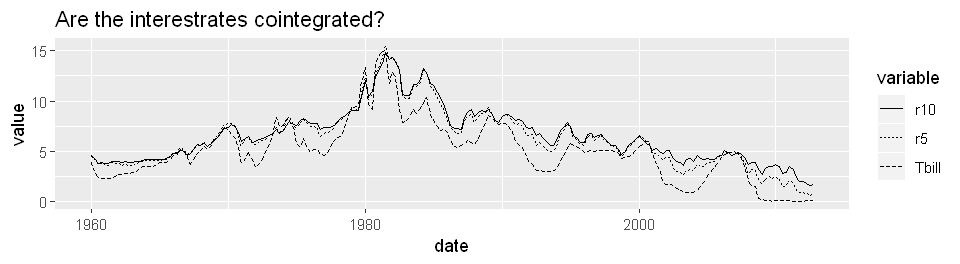

In [90]:
quarterly <- read_excel("Data/quarterly.xls")
quarterly$date <- as.Date(as.yearqtr(quarterly$DATE, format = "%YQ%q"))
head(quarterly,3)

p <- quarterly %>%
  dplyr::select(date, Tbill, r5, r10) %>%
  gather(variable, value, -date) %>%
  ggplot(aes(date, value, linetype=variable)) + 
    geom_line() + 
    labs(title="Are the interestrates cointegrated?")
print(p)

In [15]:
tbi   <- as.ts(quarterly$Tbill)
r5    <- as.ts(quarterly$r5)
r10   <- as.ts(quarterly$r10)

dtbi   <- as.ts(diff(quarterly$Tbill))
dr5    <- as.ts(diff(quarterly$r5))
dr10   <- as.ts(diff(quarterly$r10))

### 3a. Replication of table page 402

In [16]:
#summary(dynlm(dtbi ~ L(tbi,1) + L(dtbi,1) + L(dtbi,2) + L(dtbi,3) + L(dtbi,4) + L(dtbi,5) + L(dtbi,6) + L(dtbi,7)))
#summary(dynlm(dr5 ~ L(r5,1) + L(dr5,1) + L(dr5,2) + L(dr5,3) + L(dr5,4) + L(dr5,5) + L(dr5,6) + L(dr5,7)))
#summary(dynlm(dr10 ~ L(r10,1) + L(dr10,1) + L(dr10,2) + L(dr10,3) + L(dtbi,4) + L(dtbi,5) + L(dtbi,6) + L(dtbi,7)))

In [17]:
rbind(adf.test(tbi), adf.test(r5), adf.test(r10))

statistic,parameter,alternative,p.value,method,data.name
-3.26428,5,stationary,0.07848675,Augmented Dickey-Fuller Test,tbi
-1.663388,5,stationary,0.7171767,Augmented Dickey-Fuller Test,r5
-1.443424,5,stationary,0.8094145,Augmented Dickey-Fuller Test,r10


### 3b. Estimate the cointegrating relationships using the Engel-Granger prodecure

In [18]:
reg <- lm(tbi ~ r5 + r10)
summary(reg)


Call:
lm(formula = tbi ~ r5 + r10)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.00754 -0.45058 -0.03363  0.30297  2.51070 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.3668     0.1586   2.312   0.0217 *  
r5            2.7430     0.1320  20.775   <2e-16 ***
r10          -1.9055     0.1417 -13.443   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7013 on 209 degrees of freedom
Multiple R-squared:  0.9456,	Adjusted R-squared:  0.9451 
F-statistic:  1818 on 2 and 209 DF,  p-value: < 2.2e-16


In [19]:
res <- as.ts(reg$residual)
dres <- as.ts(diff(res))
#summary(dynlm(dres ~ L(res) + L(dres) + L(dres,2) + L(dres,3) + L(dres,4) + L(dres,5) + L(dres,6) + L(dres,7) + L(dres,8)))

Jeg finder at t-værdien er -4.08 og den kritiske værdi er -3.76, derfor er residualerne stationære og de tre variabler er cointegrerede CI(1,1)

### 3c. repeat with R10 as dependent variable

In [20]:
reg2 <- lm(r10 ~ r5 + tbi)
reg2


Call:
lm(formula = r10 ~ r5 + tbi)

Coefficients:
(Intercept)           r5          tbi  
     0.5028       1.1630      -0.2434  


In [21]:
res <- as.ts(reg2$residual)
dres <- as.ts(diff(res))
summary(dynlm(dres ~ L(res) + L(dres) + L(dres,2) + L(dres,3) + L(dres,4) + L(dres,5) + L(dres,6)))


Time series regression with "ts" data:
Start = 8, End = 212

Call:
dynlm(formula = dres ~ L(res) + L(dres) + L(dres, 2) + L(dres, 
    3) + L(dres, 4) + L(dres, 5) + L(dres, 6))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.53111 -0.06803 -0.00249  0.08006  0.34074 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.00815    0.00882   0.924   0.3566    
L(res)      -0.10229    0.04392  -2.329   0.0209 *  
L(dres)      0.03252    0.07431   0.438   0.6621    
L(dres, 2)  -0.37934    0.07422  -5.111 7.56e-07 ***
L(dres, 3)   0.08643    0.07672   1.127   0.2613    
L(dres, 4)  -0.17467    0.07696  -2.269   0.0243 *  
L(dres, 5)   0.02413    0.06991   0.345   0.7304    
L(dres, 6)  -0.21539    0.06973  -3.089   0.0023 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1255 on 197 degrees of freedom
Multiple R-squared:  0.2291,	Adjusted R-squared:  0.2017 
F-statistic: 8.363 on 7 and 197 DF,  p-va

De tre variabler er ikke kointegrerede eftersom t-vrdien kun er -2.329 mens den skulle være mindre end -3.76 for at vi kan konkludere variablerne er kointegrerede. Dette viser svagheden ved Engel-Granger metoden.. 

# Exercise 4 (Quantitative)
Enders exercise 9. Question d is optional. Skip question (e) and (f), but answer question (g).Make sure that the data is from 1974:01 to 2013:11 - however, missing data implies that the data e⁄ectively ends in 2012:12

In [104]:
ppp <- read_excel("Data/Coint_ppp.xls")

ppp$ENTRY <- NULL
ppp$CANCPI <- as.numeric(ppp$CANCPI)
ppp$JAPANEX <- as.numeric(ppp$JAPANEX)
ppp$JAPANCPI <- as.numeric(ppp$JAPANCPI)
ppp$SWCPI <- as.numeric(ppp$SWCPI)

ppp$date <- seq(as.Date("1974/1/1"),as.Date("2013/11/1"), by = "month")
ppp <- subset(ppp, ppp$date <= as.Date("2012/12/1"))

head(ppp)

USCPI,CANEX,CANCPI,JAPANEX,JAPANCPI,SWEX,SWCPI,date
117.293,0.992,121.077,299.685,135.294,3.364,127.774,1974-01-01
118.546,0.977,122.057,291.658,139.706,3.176,126.836,1974-02-01
119.799,0.972,123.528,287.949,140.294,3.079,127.431,1974-03-01
120.551,0.968,124.508,292.197,144.118,3.027,126.662,1974-04-01
121.805,0.962,126.959,291.430,144.706,2.917,128.886,1974-05-01
122.807,0.966,127.939,293.466,145.294,2.990,129.571,1974-06-01


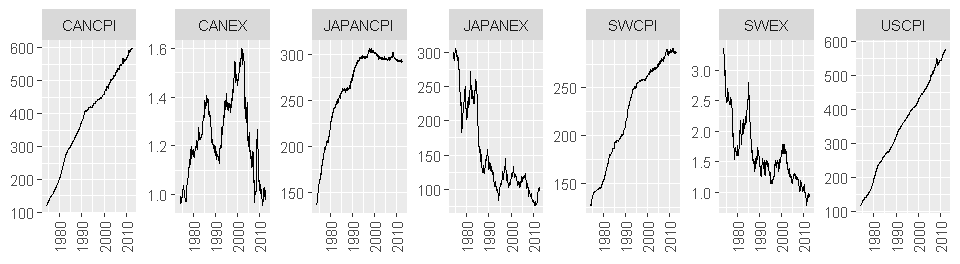

In [105]:
p <- ppp %>%
  gather(variable, value, -date) %>%
  ggplot(aes(date, value)) + 
    geom_line() + 
    facet_wrap(~variable, nrow=1, scale="free") + 
    theme(axis.title.x = element_blank(),
          axis.title.y = element_blank(),
          axis.text.x=element_text(angle=90,hjust=1,vjust=0.5),)
print(p)

### 9a. Pretest for stationarity with ADF

In [106]:
ppp$l_USCPI    <- log(ppp$USCPI)
ppp$l_CANEX    <- log(ppp$CANEX)
ppp$l_CANCPI   <- log(ppp$CANCPI)
ppp$l_JAPANEX  <- log(ppp$JAPANEX)
ppp$l_JAPANCPI <- log(ppp$JAPANCPI)
ppp$l_SWEX     <- log(ppp$SWEX)
ppp$l_SWCPI    <- log(ppp$SWCPI)

In [107]:
rbind(adf.test(ppp$l_USCPI),
adf.test(ppp$l_CANEX),
adf.test(ppp$l_CANCPI),
adf.test(ppp$l_JAPANEX),
adf.test(ppp$l_JAPANCPI),
adf.test(ppp$l_SWEX),
adf.test(ppp$l_SWCPI))

statistic,parameter,alternative,p.value,method,data.name
-2.439607,7,stationary,0.3920258,Augmented Dickey-Fuller Test,ppp$l_USCPI
-1.261758,7,stationary,0.8902385,Augmented Dickey-Fuller Test,ppp$l_CANEX
-3.430845,7,stationary,0.04908418,Augmented Dickey-Fuller Test,ppp$l_CANCPI
-1.955345,7,stationary,0.5968613,Augmented Dickey-Fuller Test,ppp$l_JAPANEX
-4.581315,7,stationary,0.01,Augmented Dickey-Fuller Test,ppp$l_JAPANCPI
-2.928872,7,stationary,0.185074,Augmented Dickey-Fuller Test,ppp$l_SWEX
-0.2573018,7,stationary,0.99,Augmented Dickey-Fuller Test,ppp$l_SWCPI


Only Japan can clearly reject a unit root (in the CPI)

### 9b. Estimate long run relationship with Japan

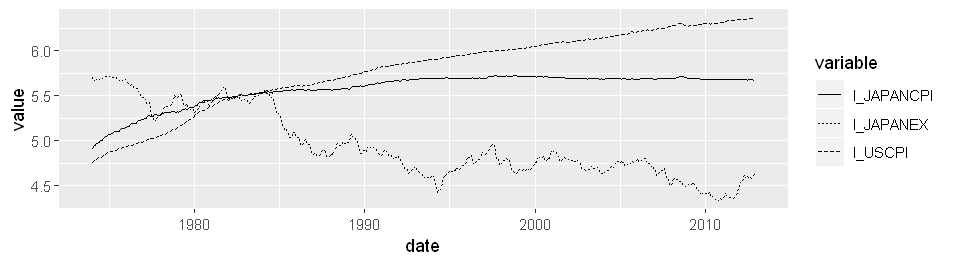

In [122]:
p <- ppp %>%
  dplyr::select(date, l_JAPANCPI, l_JAPANEX, l_USCPI) %>%
  gather(variable, value, -date) %>%
  ggplot(aes(date, value, linetype=variable)) + 
    geom_line()
print(p)

In [70]:
reg <- lm(l_JAPANEX ~ l_JAPANCPI + l_USCPI, data= ppp)
summary(reg)


Call:
lm(formula = l_JAPANEX ~ l_JAPANCPI + l_USCPI, data = ppp)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.41312 -0.10770 -0.01184  0.08863  0.42784 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.97459    0.36593  27.258   <2e-16 ***
l_JAPANCPI  -0.10420    0.10667  -0.977    0.329    
l_USCPI     -0.76823    0.04505 -17.054   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.156 on 465 degrees of freedom
Multiple R-squared:  0.8336,	Adjusted R-squared:  0.8329 
F-statistic:  1165 on 2 and 465 DF,  p-value: < 2.2e-16


### 9c. Test the residuals of the long run relationship with Dickey-Fuller (but Engel-Granger distributions)

In [71]:
res <- as.ts(reg$residual)
dres <- as.ts(diff(res))
summary(dynlm(dres ~ L(res) + L(dres) + L(dres,2) + L(dres,3) + L(dres,4) + L(dres,5) + L(dres,6) + L(dres,7) + L(dres,8) + L(dres,9) + L(dres,10) + L(dres,11)))


Time series regression with "ts" data:
Start = 13, End = 468

Call:
dynlm(formula = dres ~ L(res) + L(dres) + L(dres, 2) + L(dres, 
    3) + L(dres, 4) + L(dres, 5) + L(dres, 6) + L(dres, 7) + 
    L(dres, 8) + L(dres, 9) + L(dres, 10) + L(dres, 11))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.088538 -0.015115  0.001474  0.017752  0.070956 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0001527  0.0011971   0.128 0.898536    
L(res)      -0.0284398  0.0083002  -3.426 0.000669 ***
L(dres)      0.3262752  0.0466046   7.001 9.47e-12 ***
L(dres, 2)  -0.0307873  0.0491253  -0.627 0.531172    
L(dres, 3)   0.0736208  0.0491925   1.497 0.135213    
L(dres, 4)   0.0283769  0.0492379   0.576 0.564690    
L(dres, 5)  -0.0546438  0.0493337  -1.108 0.268620    
L(dres, 6)  -0.0440389  0.0494875  -0.890 0.374003    
L(dres, 7)   0.0061875  0.0496324   0.125 0.900844    
L(dres, 8)   0.1098243  0.0497298   2.208 0.027727 *  
L(dres, 9)   0

### 9d Repeat with Canada and Switcherland

In [81]:
reg <- lm(l_CANEX ~ l_CANCPI + l_USCPI, data= ppp)
res <- as.ts(reg$residual)
dres <- as.ts(diff(res))
#summary(dynlm(dres ~ L(res) + L(dres) + L(dres,2) + L(dres,3) + L(dres,4) + L(dres,5) + L(dres,6) + L(dres,7) + L(dres,8) + L(dres,9) + L(dres,10)))

In [82]:
reg <- lm(l_SWEX ~ l_SWCPI + l_USCPI, data= ppp)
res <- as.ts(reg$residuals)
dres <- as.ts(diff(res))
#summary(dynlm(dres ~ L(res) + L(dres) + L(dres,2) + L(dres,3) + L(dres,4) + L(dres,5) + L(dres,6) + L(dres,7) + L(dres,8) + L(dres,9) + L(dres,10)))

### 9e Estimate error correction model with Japan

### 9f Impulse response functions

### 9g Are the results sensitive to normalisation (which is the dependent variable in long run regression)

# Exercise 5 (Quantitative)
Enders exercise 10. Data from 1974:1 - 2013:10. Remember, 11 lags in VECM , 12 lags in VAR. Tips below. Interpret only the table and show that there is a single cointegration vector. Skip question (b).

In [125]:
df <- data.frame(ppp$l_CANCPI, ppp$l_CANEX, ppp$l_USCPI)

summary(ca.jo(df,                 # Data, only the tree variables
              type="trace",       # Type trace or max test
              K=12,               # Number of lags, one more than the VECM model
              ecdet="const",      # deterministic components in cointegration relation
              spec="transitory"))

summary(ca.jo(df, type="eigen", K=12, ecdet="const", spec="transitory"))


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , without linear trend and constant in cointegration 

Eigenvalues (lambda):
[1] 5.458807e-02 1.420103e-02 8.560764e-03 1.137951e-17

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 2 |  3.92  7.52  9.24 12.97
r <= 1 | 10.44 17.85 19.96 24.60
r = 0  | 36.04 32.00 34.91 41.07

Eigenvectors, normalised to first column:
(These are the cointegration relations)

                ppp.l_CANCPI.l1 ppp.l_CANEX.l1 ppp.l_USCPI.l1   constant
ppp.l_CANCPI.l1       1.0000000      1.0000000      1.0000000  1.0000000
ppp.l_CANEX.l1        0.1099233     -0.6893793     -0.2509807  0.4471240
ppp.l_USCPI.l1       -0.2059659     -0.9857697     -0.9448641 -1.0124870
constant             -5.1195212     -0.2852886     -0.3541008 -0.1860402

Weights W:
(This is the loading matrix)

               ppp.l_CANCPI.l1 ppp.l_CANEX.l1 ppp.l_USCPI.l1      constant
ppp.l_CANCPI.


###################### 
# Johansen-Procedure # 
###################### 

Test type: maximal eigenvalue statistic (lambda max) , without linear trend and constant in cointegration 

Eigenvalues (lambda):
[1] 5.458807e-02 1.420103e-02 8.560764e-03 1.137951e-17

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 2 |  3.92  7.52  9.24 12.97
r <= 1 |  6.52 13.75 15.67 20.20
r = 0  | 25.60 19.77 22.00 26.81

Eigenvectors, normalised to first column:
(These are the cointegration relations)

                ppp.l_CANCPI.l1 ppp.l_CANEX.l1 ppp.l_USCPI.l1   constant
ppp.l_CANCPI.l1       1.0000000      1.0000000      1.0000000  1.0000000
ppp.l_CANEX.l1        0.1099233     -0.6893793     -0.2509807  0.4471240
ppp.l_USCPI.l1       -0.2059659     -0.9857697     -0.9448641 -1.0124870
constant             -5.1195212     -0.2852886     -0.3541008 -0.1860402

Weights W:
(This is the loading matrix)

               ppp.l_CANCPI.l1 ppp.l_CANEX.l1 ppp.l_USCPI.l1  